## Forex environment test

In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(""), os.pardir)))

In [2]:
import pandas as pd
from stable_baselines3.common.env_checker import check_env
from environments.forex import *
from data.forex import *

In [3]:
test_target_prices_df = pd.DataFrame({
    '<DT>' : [t for t in range(11)],
    '<OPEN>' : [100.0, 100.0, 104.0, 103.0, 107.0, 104.0, 103.0, 101.0, 100.0, 100.0, 97.0],
    '<CLOSE>' : [100.0, 105.0, 102.0, 107.0, 104.0, 102.0, 100.0, 100.0, 99.0, 98.0, 100.0]
})
test_features_df = test_target_prices_df

In [4]:
test_env = ForexEnvBasic(
    test_target_prices_df,
    test_features_df,
    portfolio_value=1000,
    allowed_actions={Actions.SELL, Actions.CLOSE, Actions.BUY},
    market_order_strategy=MarketOrderStrategyAllIn(),
    reward_strategy=RewardStrategyLogPortfolioReturn(),
    trading_costs_strategy=TradingCostsStrategySpread(spread=1),
    include_in_obs = ['position']
)

In [5]:
check_env(test_env)

In [6]:
test_env.reset()

array([  0., 100., 100.,   0.])

In [7]:
for action in [
    Actions.BUY,
    Actions.BUY,
    Actions.BUY,
    Actions.SELL,
    Actions.SELL,
    Actions.CLOSE,
    Actions.CLOSE,
    Actions.CLOSE,
    Actions.SELL,
    Actions.BUY
]:
    next_observation, reward, done, _ = test_env.step(action.value + 1)
    print(next_observation)
    if done: break

[  1. 100. 105.   1.]
[  2. 104. 102.   1.]
[  3. 103. 107.   1.]
[  4. 107. 104.  -1.]
[  5. 104. 102.  -1.]
[  6. 103. 100.   0.]
[  7. 101. 100.   0.]
[  8. 100.  99.   0.]
[  9. 100.  98.  -1.]
[ 10.  97. 100.   1.]


In [8]:
test_env.history

{'portfolio_value': [1000,
  1040.0,
  1010.0,
  1060.0,
  1089.7196261682243,
  1109.5327102803737,
  1089.719626168224,
  1089.719626168224,
  1089.719626168224,
  1111.5140186915885,
  1134.6565179689753],
 'reward': [0,
  0.03922071315328133,
  -0.029270382300113224,
  0.04831857727080773,
  0.02765153133050995,
  0.018018505502678212,
  -0.018018505502678476,
  0,
  0,
  0.01980262729617973,
  0.020606911041696842],
 'position': [<Positions.NONE: 0>,
  <Positions.LONG: 1>,
  <Positions.LONG: 1>,
  <Positions.LONG: 1>,
  <Positions.SHORT: -1>,
  <Positions.SHORT: -1>,
  <Positions.NONE: 0>,
  <Positions.NONE: 0>,
  <Positions.NONE: 0>,
  <Positions.SHORT: -1>,
  <Positions.LONG: 1>],
 'trading_costs': [0,
  10.0,
  0,
  0,
  0,
  0,
  9.906542056074766,
  0,
  0,
  0,
  22.468445900375755],
 'order_size': [0,
  1000.0,
  1000.0,
  1000.0,
  1060.0,
  1060.0,
  1099.626168224299,
  1099.626168224299,
  1099.626168224299,
  1089.719626168224,
  1122.4112149532707],
 'last_trade_price

```
t=0  o(t)=100 c(t)=100 v(t)=1000
t=1  o(t)=100 c(t)=105 v(t)=1000 + 1000*(105-100)/100 - 1000*1/100 = 1040        
t=2  o(t)=104 c(t)=102 v(t)=1040 + 1000*(104-105)/100 + 1000*(102-104)/100 = 1010
t=3  o(t)=103 c(t)=107 v(t)=1010 + 1000*(103-102)/100 + 1000*(107-103)/100 = 1060
t=4  o(t)=107 c(t)=104 v(t)=1060 - 1060*(104-107)/107 ~ 1089.72                                          
t=5  o(t)=104 c(t)=102 v(t)=1089.72 - 1060*(102-104)/107 ~ 1109.53        
t=6  o(t)=103 c(t)=100 v(t)=1109.53 - 1060*(103-102)/107 - 1060/107 ~ 1089.72                          
t=7  o(t)=101 c(t)=100 v(t)=1089.72 
t=8  o(t)=100 c(t)=99  v(t)=1089.72
t=9  o(t)=100 c(t)=98  v(t)=1089.72 - 1089.72(98-100)/100 ~ 1111.51                                       
t=10 o(t)=97  c(t)=100 v(t)=1111.51 - 1089.72(97-98)/100 + 1122.41(100-97)/97 - 1089.72/100 - 1122.41/97 ~ 1134.65
```

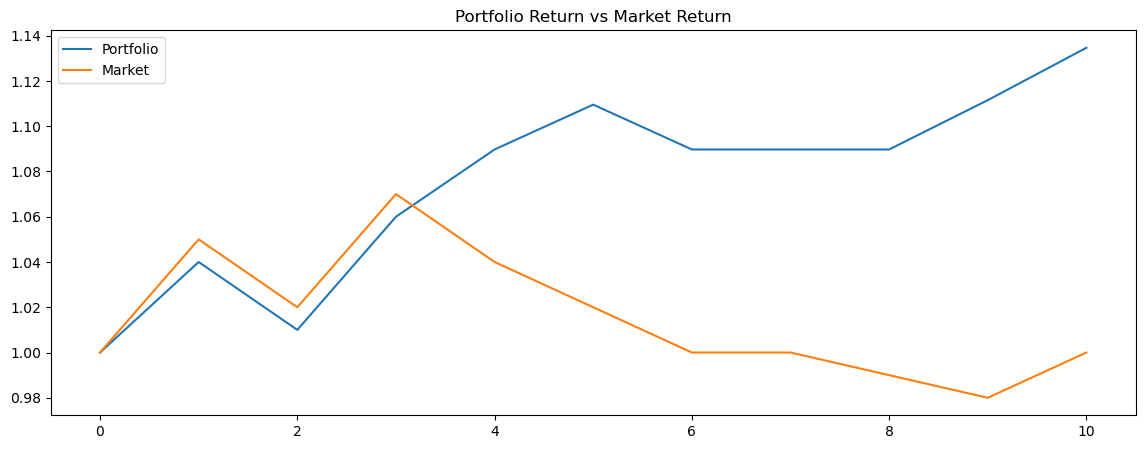

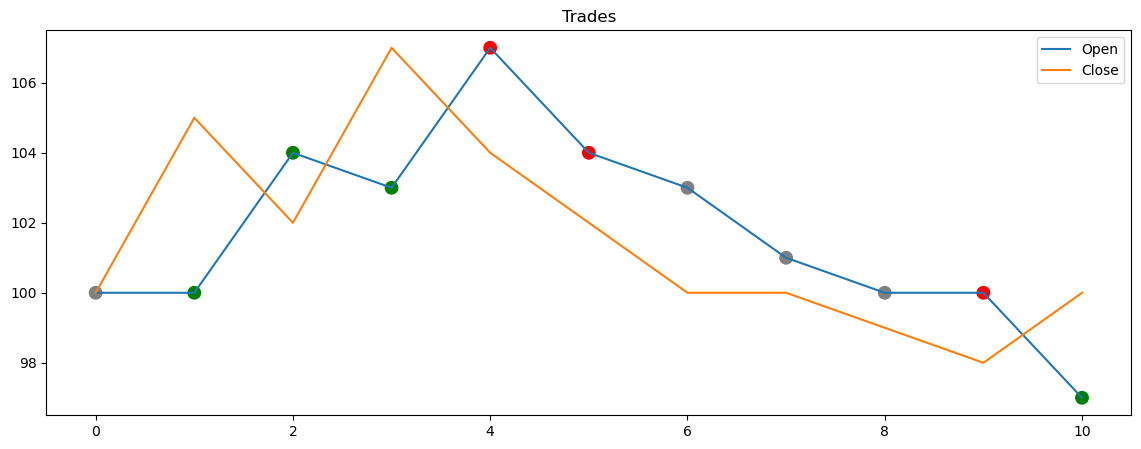

In [9]:
test_env.render()

In [10]:
forex_data = load_processed_forex_data(ForexDataSource.FOREXTESTER, pairs=['EURUSD'], version='Agg')

In [11]:
eurusd_env = ForexEnvBasic(
    forex_data['EURUSD'],
    forex_data['EURUSD'],
    portfolio_value=1000,
    allowed_actions={Actions.SELL, Actions.CLOSE, Actions.BUY},
    market_order_strategy=MarketOrderStrategyAllIn(),
    reward_strategy=RewardStrategyLogPortfolioReturn(),
    trading_costs_strategy=TradingCostsStrategySpread(spread=0.0001),
    include_in_obs = ['position']
)

In [12]:
observation = eurusd_env.reset()

for i in range(100):
    next_observation, reward, done, _ = eurusd_env.step(2)

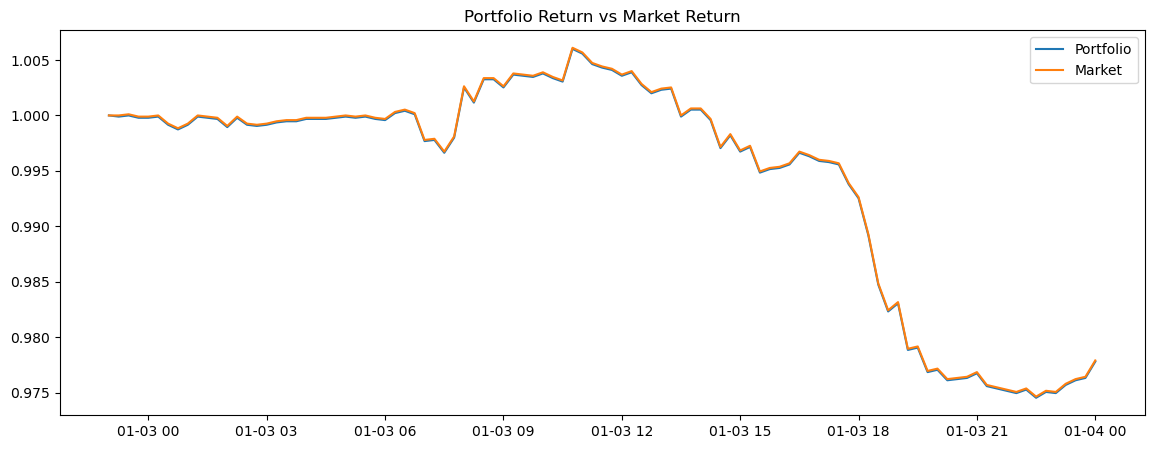

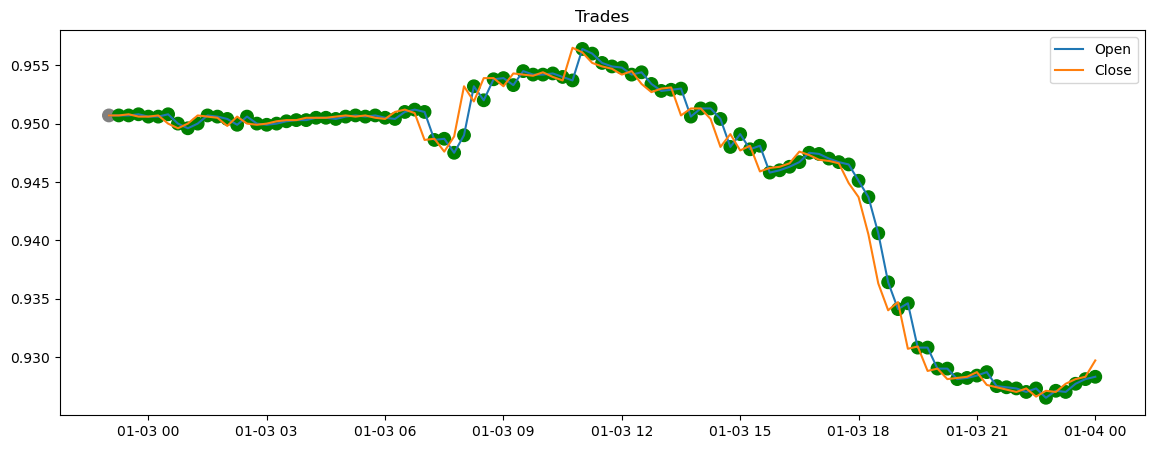

In [13]:
eurusd_env.render()

In [14]:
observation = eurusd_env.reset()

for i in range(100):
    next_observation, reward, done, _ = eurusd_env.step(0)

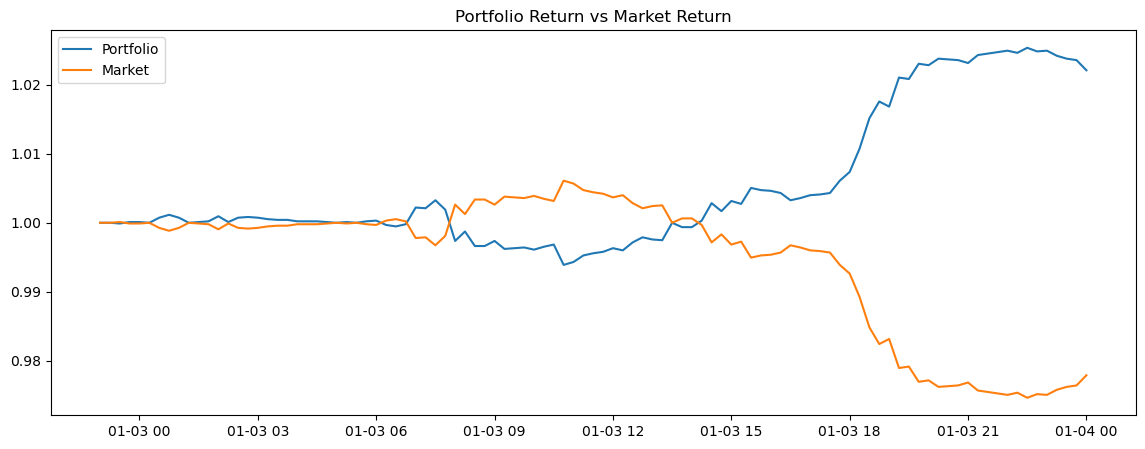

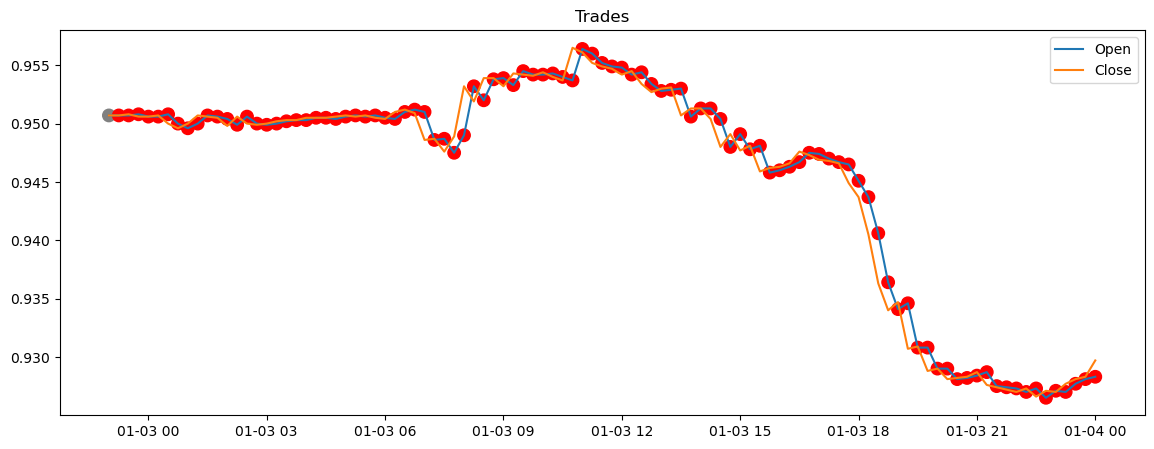

In [15]:
eurusd_env.render()

In [16]:
observation = eurusd_env.reset()

for i in range(100):
    action = eurusd_env.action_space.sample()
    next_observation, reward, done, _ = eurusd_env.step(action)

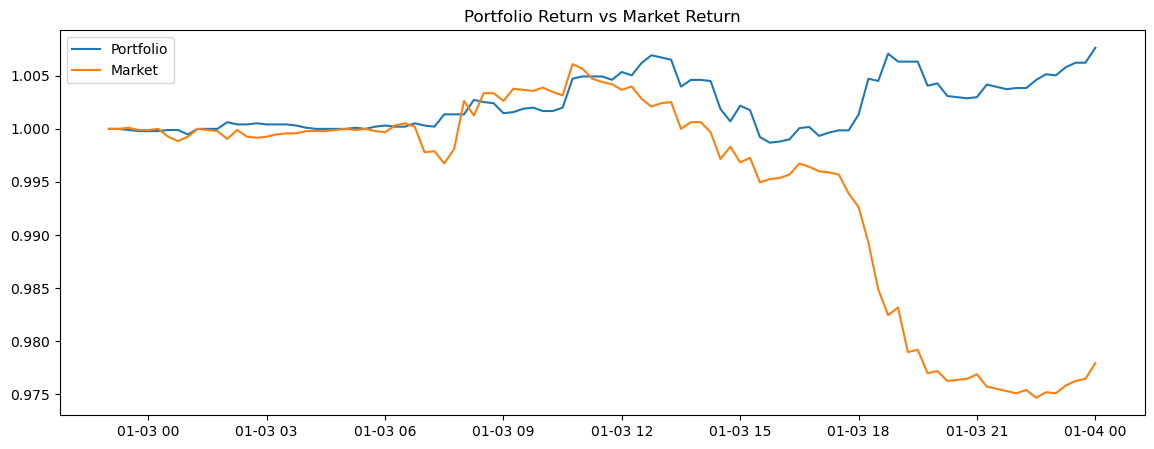

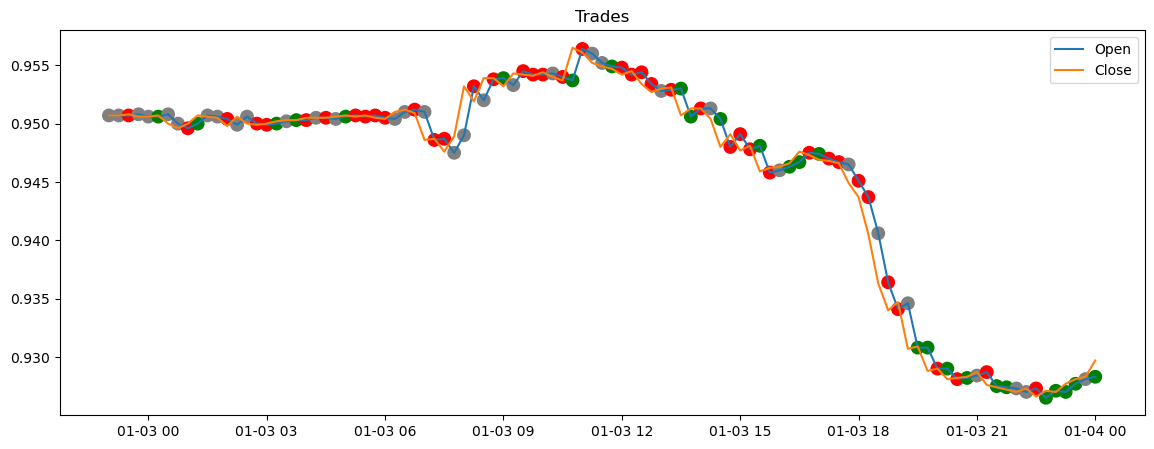

In [17]:
eurusd_env.render()